In [28]:
#Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Define the dataset column names (features) as the raw UCI file lacks headers
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load the Heart Disease UCI dataset (Cleveland database)
# The original file uses '?' for missing values, so we handle that directly.
data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
df = pd.read_csv(data_url, names=columns, na_values='?')

print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


Shape before dropping NA: (303, 14)
Shape after dropping NA: (297, 14)

Target variable converted to binary (0: No Disease, 1: Disease Present).


C:\Users\asus\AppData\Local\Temp\ipykernel_7832\473630248.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ca'] = df_cleaned['ca'].astype(int)
C:\Users\asus\AppData\Local\Temp\ipykernel_7832\473630248.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['thal'] = df_cleaned['thal'].astype(int)
C:\Users\asus\AppData\Local\Temp\ipykernel_7832\473630248.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

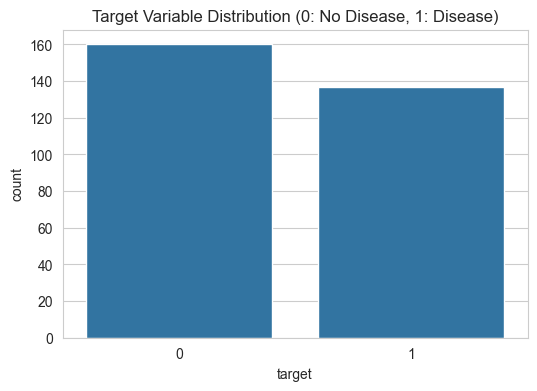

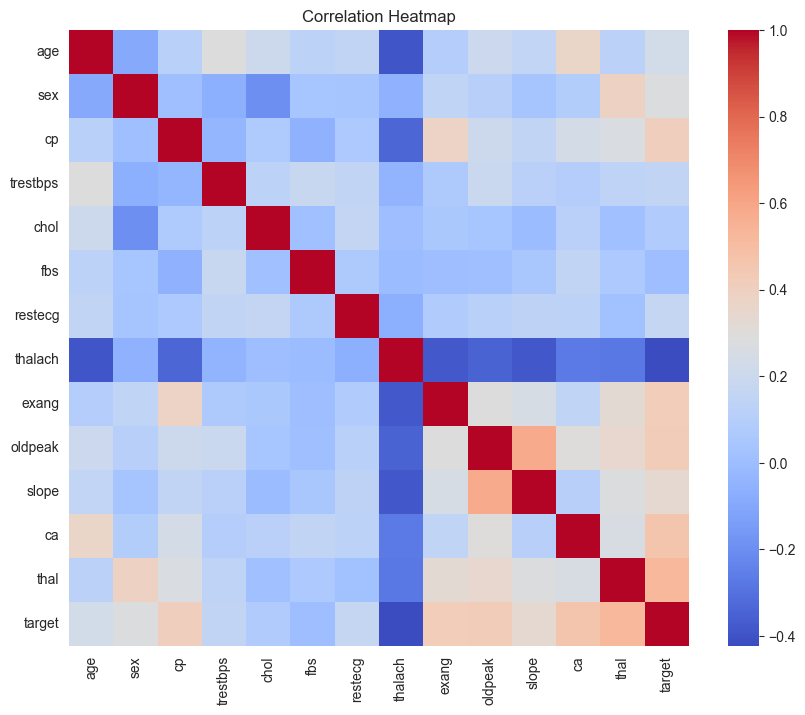


Shape of the cleaned and encoded feature set (X): (297, 22)
First 5 rows of the cleaned and encoded feature set:
        age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  ca  \
0  0.936181  1.0  0.750380 -0.276443  1.0  0.017494    0.0  1.068965   0   
1  1.378929  1.0  1.596266  0.744555  0.0 -1.816334    1.0  0.381773   3   
2  1.378929  1.0 -0.659431 -0.353500  0.0 -0.899420    1.0  1.326662   2   
3 -1.941680  1.0 -0.095506  0.051047  0.0  1.633010    0.0  2.099753   0   
4 -1.498933  0.0 -0.095506 -0.835103  0.0  0.978071    0.0  0.295874   0   

   cp_1.0  ...  cp_4.0  restecg_0.0  restecg_1.0  restecg_2.0  slope_1.0  \
0    True  ...   False        False        False         True      False   
1   False  ...    True        False        False         True      False   
2   False  ...    True        False        False         True      False   
3   False  ...   False         True        False        False      False   
4   False  ...   False        False        False 

In [29]:
#Data Preprocessing
from sklearn.preprocessing import StandardScaler

#Handling Missing Values
#The 'ca' and 'thal' columns have a few missing values ('?').
#remove the few rows with any missing data.
print(f"Shape before dropping NA: {df.shape}")
df_cleaned = df.dropna()
print(f"Shape after dropping NA: {df_cleaned.shape}")

#Convert 'ca' and 'thal' to integer type
df_cleaned['ca'] = df_cleaned['ca'].astype(int)
df_cleaned['thal'] = df_cleaned['thal'].astype(int)

#Transform Target Variable
#The target is 0, 1, 2, 3, 4. We convert it to a binary problem: 0 (No Disease) or 1 (Disease Present).
df_cleaned['target'] = df_cleaned['target'].apply(lambda x: 1 if x > 0 else 0)
print("\nTarget variable converted to binary (0: No Disease, 1: Disease Present).")

#Exploratory Data Analysis (EDA)
#Display target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_cleaned)
plt.title('Target Variable Distribution (0: No Disease, 1: Disease)')
plt.show()

#Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Data Encoding and Scaling
#Separate features (X) and target (y)
X = df_cleaned.drop('target', axis=1)
y = df_cleaned['target']

#One-Hot Encoding for categorical features (cp, restecg, slope, thal)
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])

#Standardize numerical features
scaler = StandardScaler()
#Identify numerical columns that need scaling
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
#Apply scaling to only the numerical columns
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

#Final check of the preprocessed dataset
print("\nShape of the cleaned and encoded feature set (X):", X_encoded.shape)
print("First 5 rows of the cleaned and encoded feature set:")
print(X_encoded.head())

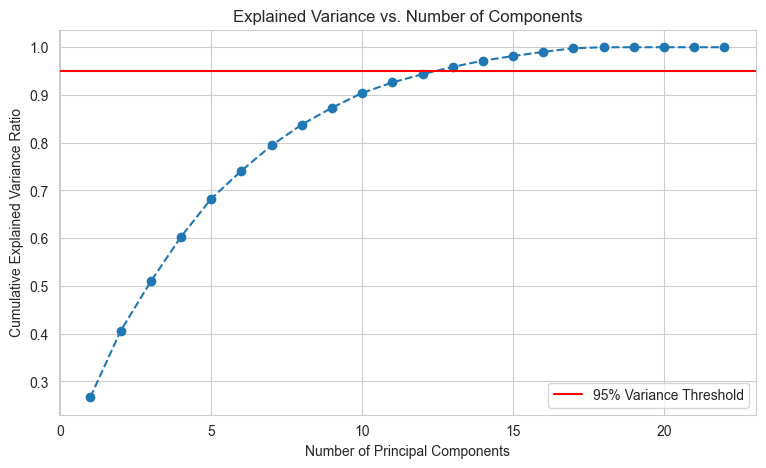


13 components are required to retain 95% of the original variance.

Final feature set is now the PCA-transformed data:
Original features: 22, Reduced features: 13
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.913108  0.265189  1.289809  0.081717 -0.394963  0.959967  0.633299   
1 -3.339439  0.836302 -0.307514  0.778074  0.475366 -0.773493  0.521851   
2 -2.488022 -1.073767 -0.634776  0.101327  0.700126  0.291261  0.526787   
3  1.257838 -0.600138  1.461446 -2.472742  0.417088  1.586984 -0.499904   
4  1.785177 -0.290629  0.943317 -0.622677  0.231344  0.351782  0.933501   

        PC8       PC9      PC10      PC11      PC12      PC13  
0  0.726928 -0.228139  0.491604  0.652440  0.379902 -0.221945  
1 -1.273104 -0.133438 -0.176609  0.104898  0.699501 -0.066492  
2  0.769990  0.006058 -0.224435 -0.065485  0.059613  0.280657  
3 -0.552588 -0.085262  0.363046 -0.138129  0.422952 -0.286137  
4 -0.513713 -0.587338 -0.046725  0.462491 -0.739603  0.559223  


In [30]:
#Dimensionality Reduction - PCA
from sklearn.decomposition import PCA

X_pca = X_encoded.copy()

#Apply PCA and Visualize Explained Variance
pca = PCA()
pca.fit(X_pca)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

#Visualize PCA results
plt.figure(figsize=(9, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Threshold')
plt.legend(loc='lower right')
plt.grid(True)
plt.show() # 

#Determine the Optimal Number of Components
n_components = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"\n{n_components} components are required to retain 95% of the original variance.")

#Apply PCA with the Optimal Number of Components
pca_final = PCA(n_components=n_components)
X_final = pca_final.fit_transform(X_pca)

#Convert the resulting NumPy array back to a DataFrame for consistency
pca_component_names = [f'PC{i+1}' for i in range(n_components)]
X_final = pd.DataFrame(X_final, columns=pca_component_names)

print("\nFinal feature set is now the PCA-transformed data:")
print(f"Original features: {X_pca.shape[1]}, Reduced features: {X_final.shape[1]}")
print(X_final.head())

Dataset split: Training=237 samples, Testing=60 samples

Training and evaluating: Logistic Regression...
  Accuracy: 0.9000, F1-Score: 0.8750, AUC: 0.9560

Training and evaluating: Decision Tree...
  Accuracy: 0.8000, F1-Score: 0.7857, AUC: 0.8194

Training and evaluating: Random Forest...
  Accuracy: 0.8833, F1-Score: 0.8511, AUC: 0.9647

Training and evaluating: SVM...
  Accuracy: 0.9167, F1-Score: 0.8936, AUC: 0.9468

--- Model Performance Metrics ---
                     Accuracy  F1-Score     AUC
Logistic Regression    0.9000    0.8750  0.9560
Decision Tree          0.8000    0.7857  0.8194
Random Forest          0.8833    0.8511  0.9647
SVM                    0.9167    0.8936  0.9468


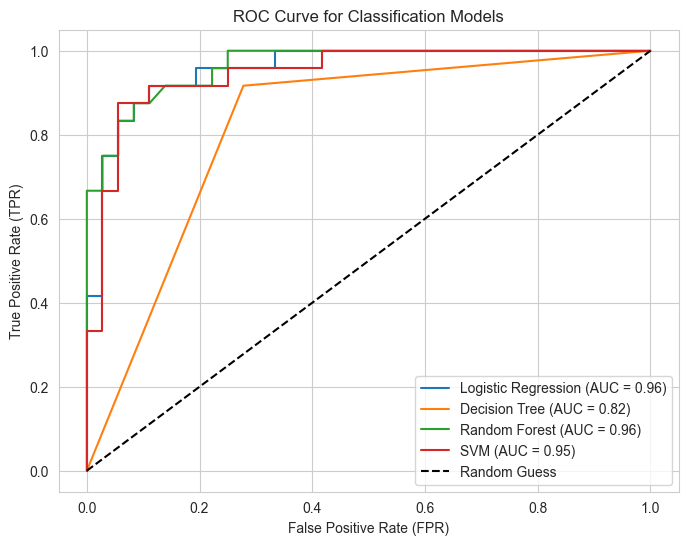


Random Forest selected as the best classifier


In [31]:
#Supervised Learning - Classification Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc

# Ensure y has the same index as the PCA-transformed X_final
y.index = X_final.index 

#Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
print(f"Dataset split: Training={len(X_train)} samples, Testing={len(X_test)} samples")

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42)
}

#Train and Evaluate Models
results = {}
roc_data = {}
for name, model in models.items():
    print(f"\nTraining and evaluating: {name}...")
    
    #Train the model
    model.fit(X_train, y_train)
    
    #Predict on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if name != "SVM" else model.predict_proba(X_test)[:, 1]
    
    #Evaluate metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    #Calculate ROC Curve and AUC Score
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    results[name] = {'Accuracy': acc, 'F1-Score': f1, 'AUC': roc_auc}
    roc_data[name] = (fpr, tpr, roc_auc)
    
    print(f"  Accuracy: {acc:.4f}, F1-Score: {f1:.4f}, AUC: {roc_auc:.4f}")

#Display all results
results_df = pd.DataFrame(results).T
print("\n--- Model Performance Metrics ---")
print(results_df.round(4))

#Visualize ROC Curves
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Classification Models')
plt.legend()
plt.show() # 

#Select Random Forest as our initial "best" model for the next steps
best_classifier = models['Random Forest']
print("\nRandom Forest selected as the best classifier")

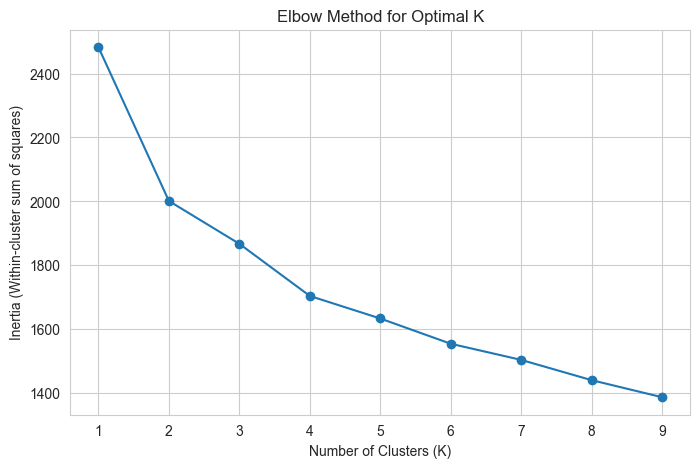

The 'elbow' point on the graph suggests the best number of clusters (K).

Comparison of K-Means Clusters with Actual Target Labels:
Cluster Label         0    1
Actual Disease (y)          
0                   126   34
1                    36  101


In [32]:
#Unsupervised Learning - K-Means Clustering

from sklearn.cluster import KMeans

#We use the final feature set X_final for clustering
X_cluster = X_final.copy()

#K-Means Clustering (Elbow Method)
#Test K from 1 to 9
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

#Visualize the Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.show()

print("The 'elbow' point on the graph suggests the best number of clusters (K).")

#Apply K-Means with K=2 (Since we know the target is binary)
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_cluster)

#Compare clusters with actual disease labels
comparison_table = pd.crosstab(y, cluster_labels, 
                               rownames=['Actual Disease (y)'], 
                               colnames=['Cluster Label'])
print("\nComparison of K-Means Clusters with Actual Target Labels:")
print(comparison_table)

In [33]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Use the best_classifier(Random Forest)
model_to_tune = RandomForestClassifier(random_state=42)

#Define a small parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],      
}

#Setup GridSearchCV 
grid_search = GridSearchCV(estimator=model_to_tune, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=3, 
                           verbose=0, 
                           n_jobs=-1) 

#Fit the GridSearchCV
grid_search.fit(X_train, y_train)

#Get the best model and its performance
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy Score: {grid_search.best_score_:.4f}")

#Evaluate the optimized model on the test set
y_pred_tuned = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Test Set Accuracy of Optimized Model: {test_accuracy:.4f}")

Best Parameters: {'max_depth': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy Score: 0.7975
Test Set Accuracy of Optimized Model: 0.8833


In [35]:
#Model Export
import pickle
import os

#Define the filename
model_filename = 'final_heart_disease_model.pkl'

#Save the optimized model
try:
    with open(model_filename, 'wb') as file:
        pickle.dump(best_model, file)
    
    full_path = os.path.join(os.getcwd(), model_filename)
    file_size_kb = os.path.getsize(model_filename) / 1024
    
    print(f"\nModel successfully exported as '{model_filename}'")
    
except Exception as e:
    print(f"Error during model export: {e}")


Model successfully exported as 'final_heart_disease_model.pkl'
